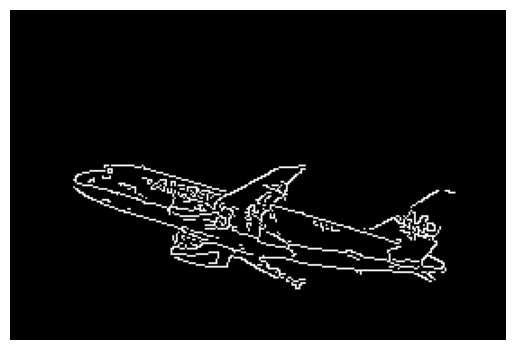

In [2]:
#8.11 Detecting Edges

# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image_gray = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold  = int(max(0, (1.0- 0.33) * median_intensity))
#حدود ۳۳٪ کمتر از میانه، ولی حداقل ۰

upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# حدود ۳۳٪ بیشتر از میانه، ولی حداکثر ۲۵۵

# Apply Canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap='gray'), plt.axis('off')
plt.show()

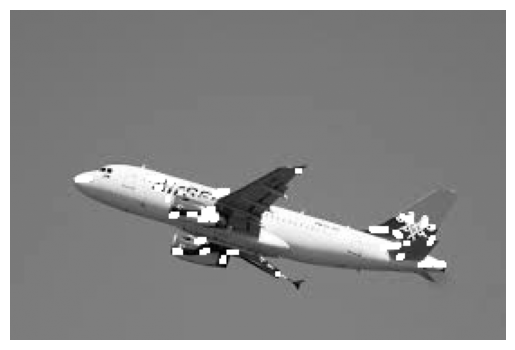

In [3]:
#8.12 Detecting Corners

# Load image
image_bgr = cv2.imread('images.jpeg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)


# Set corner detector parameters
block_size = 2
apreture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      apreture,
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

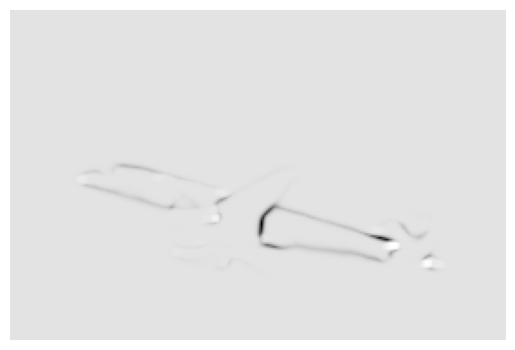

In [4]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'),plt.axis('off')
plt.show()

(<matplotlib.image.AxesImage at 0x7be2afb2b7f0>,
 (np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5)))

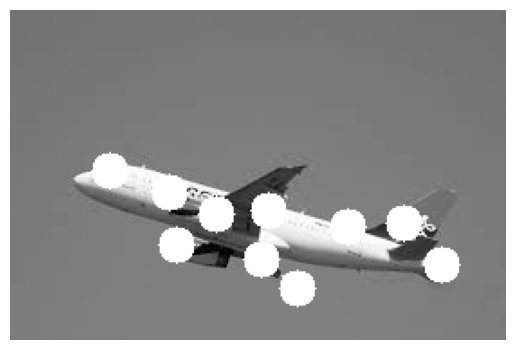

In [5]:
# Load images
image_bgr = cv2.imread('images.jpeg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)

corners = np.int16(corners)

# Draw white circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

# Convert to grayscale
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_rgb, cmap='gray'), plt.axis('off')

In [6]:
#8.13 Creating Features for Machine Learning

# Load image as grayscale
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()


array([116, 117, 118, 119, 119, 119, 118, 118, 117, 116, 117, 118, 119,
       120, 121, 121, 121, 120, 118, 117, 118, 119, 121, 122, 122, 122,
       122, 121, 120, 118, 118, 121, 123, 124, 124, 124, 123, 122, 121,
       119, 120, 123, 128, 126, 126, 126, 125, 124, 122, 121, 121,  94,
       212, 213, 123,  45, 126, 126, 131, 122, 122, 125, 124,  80,  46,
       248, 244,  76, 169, 122, 124, 125, 126,  84, 111,  92, 106, 221,
       213, 124, 124, 125, 126, 128, 128, 128, 127, 127, 125, 124, 124,
       126, 127, 128, 128, 128, 128, 127, 125, 124], dtype=uint8)

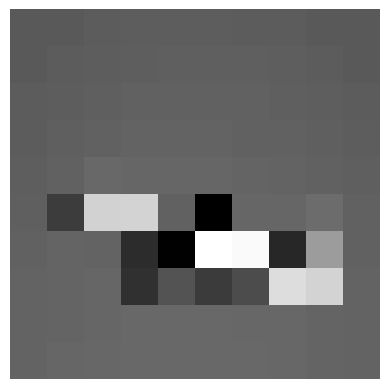

In [7]:
plt.imshow(image_10x10, cmap='gray'), plt.axis('off')
plt.show()

In [8]:
image_10x10.shape

(10, 10)

In [9]:
image_10x10.flatten().shape

(100,)

In [10]:
# Load image in color
image_color = cv2.imread('images.jpeg',cv2.IMREAD_COLOR)

# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape

(300,)

In [11]:
# Load image in grayscale
image_256x256_gray = cv2.imread('images.jpeg')

# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape

(150975,)

In [12]:
# Load image in color
image_256x256_color = cv2.imread('images.jpeg', cv2.IMREAD_COLOR)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

(150975,)

In [13]:
#8.14 Encoding Color Histograms as Features

np.random.seed(0)

# Load image
image_bgr = cv2.imread('images.jpeg',cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r", "g", "b")

# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0, 256])
    features.extend(histogram)

# Create a vector for an observation's feature values
observation = np.array(features).flatten()

# Show the observation's value for the first five features
observation[0:5]

array([33.,  7.,  4., 13., 13.], dtype=float32)

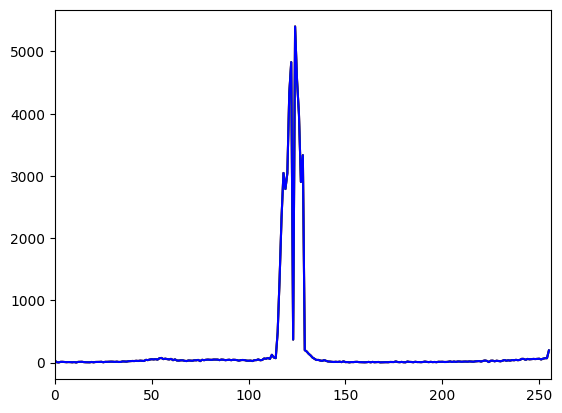

In [14]:
# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram, make plot
for i,channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],     # Index of channel
                             None,    # No mask
                             [256],   # Histogram size
                             [0,256]  # Range
                             )
    plt.plot(histogram, color = channel)
    plt.xlim([0, 256])

# Show plot
plt.show()


In [15]:
#8.15 Using Pretrained Embeddings as Features

# Load libraries
import torch
from torchvision import transforms
import  torchvision.models as models

# Load image
image_bgr = cv2.imread('images.jpeg',cv2.IMREAD_COLOR)

# Convert to pytorch data type
covert_tensor = transforms.ToTensor()
pytorch_image = covert_tensor(np.array(image_rgb))

# Load the pretrained model
model = models.resnet18(pretrained = True)

# Select the specific layer of the model we want output from
layer = model.modules.__get__('avgpool')

# Set model to evaluation mode
model.eval()

# Infer the embedding with the no_grad option
with torch.no_grad():
    embedding = model(pytorch_image.unsqueeze(0))

print(embedding.shape)

torch.Size([1, 1000])


/home/maedeh_mrd5/py-venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/maedeh_mrd5/py-venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Load libraries
import cv2
import tensorflow as tf
import tensorflow_hub as hub

# Load image
image_bgr = cv2.imread("images/plane.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convert to tensorflow data type
tf_image = tf.image.convert_image_dtype([image_rgb], tf.float32)

# Create the model and get embeddings using the inception V1 model
embedding_model = hub.KerasLayer(
"https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"
)
embeddings = embedding_model(tf_image)

# Print the shape of the embedding
print(embeddings.shape)

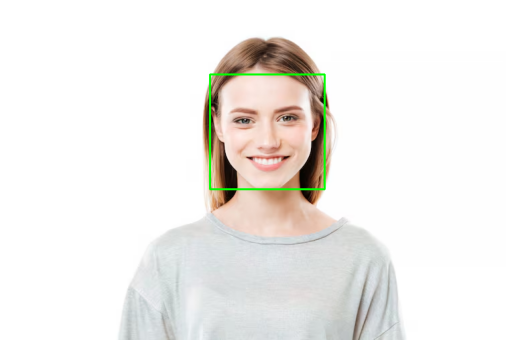

In [ ]:
#8.16 Detecting Objects with OpenCV

# Import libraries
import cv2
import matplotlib.pyplot as plt

# Load face cascade
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Load image
image_bgr = cv2.imread('face.avif', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [48]:
#8.17 Classifying Images with Pytorch
# Import libraries
import json
import urllib.request
import cv2
import torch
from torchvision import transforms
from torchvision.models import resnet18

# Get imagenet classes
url = "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"
with urllib.request.urlopen(url) as response:
    imagenet_class_index = json.load(response)

# Instantiate pretrained model
model = resnet18(pretrained=True)
model.eval()

# Load image
image_bgr = cv2.imread('images.jpeg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Preprocess image
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
pytorch_image = preprocess(image_rgb)

# Make prediction
with torch.no_grad():
    prediction = model(pytorch_image.unsqueeze(0))

# Get top class
_, index = torch.max(prediction, 1)
percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100

# Print result
print(imagenet_class_index[str(index.tolist()[0])][1],
      percentage[index.tolist()[0]].item())


airliner 93.8802719116211
